In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
! gdown --id 1cIIZv-ybWUpO49GxaNtijm14-LRA_lCj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cIIZv-ybWUpO49GxaNtijm14-LRA_lCj
To: /content/dataset_to_competition.csv
100% 588M/588M [00:07<00:00, 81.2MB/s]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/dataset_to_competition.csv')
df.head()

,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,...,ra_x,ra_y,ra_z,subj_id,gender,age,height_in,weight_lbs,race,right_handed
0,walking,0,0.086,-1.641,0.039,0.227,-1.102,-0.406,0.668,0.023,...,-0.117,1.117,0.266,0,female,33,63,143,asian,0
1,walking,1,-0.098,-1.188,0.180,0.602,-1.262,0.246,-0.449,2.824,...,-0.137,1.051,0.207,0,female,33,63,143,asian,0
2,walking,2,0.508,-1.063,0.035,-0.004,-0.707,-0.488,0.703,2.172,...,0.129,1.699,0.449,0,female,33,63,143,asian,0
3,walking,3,-0.348,-1.488,0.504,-0.180,-0.816,-0.410,0.270,0.914,...,-0.512,2.266,1.410,0,female,33,63,143,asian,0
4,walking,4,-0.059,-1.066,0.395,0.090,-0.941,-0.258,0.070,0.984,...,-0.633,0.844,0.074,0,female,33,63,143,asian,0


In [ ]:
df.describe()

,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z,subj_id,age,height_in,weight_lbs,right_handed
count,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06,4.736149e+06
mean,1.321574e+04,-2.147233e-01,-4.256108e-01,-2.948040e-02,1.294206e-01,-8.243793e-01,-4.270715e-01,1.132651e-01,1.047137e+00,2.461092e-01,-1.642669e-01,1.038636e+00,2.330902e-01,1.004584e+02,3.937033e+01,6.820546e+01,1.703492e+02,8.861138e-01
std,8.850157e+03,5.701432e-01,7.830487e-01,4.735368e-01,3.073945e-01,3.481681e-01,2.589593e-01,7.351331e-01,6.220368e-01,3.664124e-01,7.525868e-01,6.164298e-01,3.542113e-01,5.709381e+01,9.139544e+00,4.639716e+00,5.490136e+01,3.176730e-01
min,0.000000e+00,-5.273000e+00,-4.887000e+00,-2.332000e+00,-1.000000e+00,-4.262000e+00,-1.797000e+00,-7.461000e+00,-3.492000e+00,-2.801000e+00,-6.305000e+00,-1.844000e+00,-3.957000e+00,0.000000e+00,1.700000e+01,5.800000e+01,8.200000e+01,0.000000e+00
25%,5.920000e+03,-7.380000e-01,-1.148000e+00,-2.540000e-01,-7.000000e-02,-9.220000e-01,-6.600000e-01,3.100000e-02,7.420000e-01,7.800000e-02,-6.210000e-01,6.680000e-01,6.600000e-02,5.200000e+01,3.300000e+01,6.400000e+01,1.280000e+02,1.000000e+00
50%,1.195500e+04,-1.560000e-01,-2.580000e-01,2.000000e-02,1.680000e-01,-8.440000e-01,-3.550000e-01,1.680000e-01,9.840000e-01,1.480000e-01,-1.560000e-01,1.004000e+00,1.600000e-01,1.010000e+02,3.900000e+01,6.900000e+01,1.540000e+02,1.000000e+00
75%,1.937000e+04,2.070000e-01,3.400000e-01,2.700000e-01,2.930000e-01,-6.290000e-01,-2.850000e-01,3.830000e-01,1.148000e+00,3.590000e-01,-4.300000e-02,1.129000e+00,2.890000e-01,1.490000e+02,4.800000e+01,7.200000e+01,1.990000e+02,1.000000e+00
max,4.416700e+04,2.414000e+00,1.852000e+00,3.566000e+00,2.023000e+00,1.926000e+00,1.660000e+00,4.445000e+00,5.352000e+00,5.184000e+00,7.551000e+00,6.074000e+00,5.305000e+00,1.990000e+02,6.100000e+01,7.900000e+01,3.230000e+02,1.000000e+00


In [ ]:
df.columns

Index(['activity', 'time_s', 'lw_x', 'lw_y', 'lw_z', 'lh_x', 'lh_y', 'lh_z',
       'la_x', 'la_y', 'la_z', 'ra_x', 'ra_y', 'ra_z', 'subj_id', 'gender',
       'age', 'height_in', 'weight_lbs', 'race', 'right_handed'],
      dtype='object')

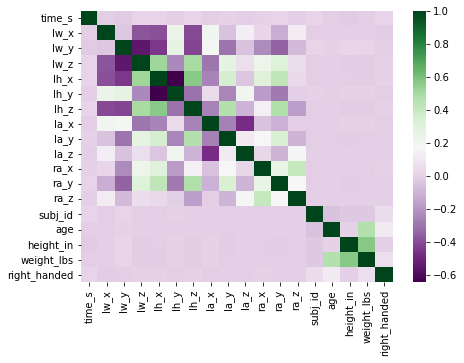

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='PRGn')

plt.show()

In [ ]:
X = df.drop(['activity'],axis=1)
y = df['activity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'Размеры обучающего набора : {X_train.shape}, Размеры тестового набора : {X_test.shape}')

Размеры обучающего набора : (3315304, 23), Размеры тестового набора : (1420845, 23)


In [ ]:
df = pd.concat([df, pd.get_dummies(df[['race', 'gender']])], axis=1)


KeyError: ignored

In [ ]:
df = df.drop(columns=['race','gender'])

In [ ]:
from sklearn.preprocessing import StandardScaler
stdSc=StandardScaler()
stdSc.fit(X)

StandardScaler()

In [ ]:
X_train_std=stdSc.transform(X_train)
X_test_std=stdSc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
rfModel = RandomForestClassifier(n_estimators=15)
rfModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
y_pred_forest = rfModel.predict(X_test)
print('Оценка модели на основе случайного леса:')
print('Acc: ',round(accuracy_score(y_test,y_pred_forest),2))


Оценка модели на основе случайного леса:
Acc:  1.0


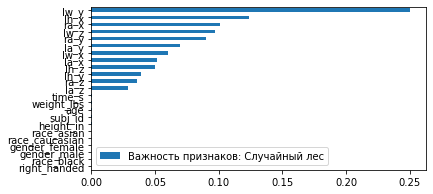

In [ ]:
feature_importances_forest = pd.DataFrame(rfModel.feature_importances_,index = X.columns,
columns=['Важность признаков: Случайный лес']).sort_values('Важность признаков: Случайный лес',ascending=True)
feature_importances_forest.plot.barh(figsize=(6, 3))

In [ ]:
%%bash
pip install pytelegrambotapi
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-4.7.1-py3-none-any.whl size=196988 sha256=fb9874255b3a5825343824cffa995d8a20145c6e59077e753aa0c0d96966e132
  Stored in directory: /root/.cache/pip/wheels/84/72/5f/8a7b3ca1ef1250002cf3bac48e0c72c5ee5c9596a5b1295dc1
Successfully built pytelegrambotapi
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=d8355ff7dfc9230f5453c6bf8f0efd6b27bffe10300d8882bc73db37079cf02e
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [ ]:
import warnings
import pickle
warnings.filterwarnings('ignore')

In [ ]:
TELEGRAM_API_TOKEN = '5546766259:AAFFkhSzug6_rQf-Tsd0YowhT4M4PI8yYWQ'
import telebot
from telebot import types

bot = telebot.TeleBot(TELEGRAM_API_TOKEN)

In [ ]:
@bot.message_handler(content_types=['text'])
def get_text_message(message):
  if message.text == '/start':
    bot.send_message(message.from_user.id,'Введите ваши данные!')
    bot.send_message(message.from_user.id, 'Введите х левого запястья')
    bot.register_next_step_handler(message, get_lwx )
  else:
    bot.send_message(message.from_user.id,'Ввведите команду /start')
    
def get_lwx(message):
    global lw_x
    lw_x = message.text
    lw_x = float(message.text)
    bot.send_message(message.from_user.id, 'Введите y левого запястья')
    bot.register_next_step_handler(message, get_lwy)


def get_lwy(message):
    global lw_y
    lw_y = message.text
    lw_y = float(message.text)
    bot.send_message(message.from_user.id, 'Введите z левого запястья')
    bot.register_next_step_handler(message, get_lwz)

def get_lwz(message):
    global lw_z
    lw_z = message.text
    lw_z = float(message.text)
    bot.send_message(message.from_user.id, 'Введите x левого бедра')
    bot.register_next_step_handler(message, get_lhx)

def get_lhx(message):
    global lh_x
    lh_x = message.text
    lh_x = float(message.text)
    bot.send_message(message.from_user.id, 'Введите y левого бедра')
    bot.register_next_step_handler(message, get_lhy)

def get_lhy(message):
    global lh_y
    lh_y= message.text
    lh_y = float(message.text)
    bot.send_message(message.from_user.id, 'Введите z левого бедра')
    bot.register_next_step_handler(message, get_lhz)


def get_lhz(message):
    global lh_z
    lh_z= message.text
    lh_z = float(message.text)
    bot.send_message(message.from_user.id, 'Введите x левой лодыжки')
    bot.register_next_step_handler(message, get_lax)

def get_lax(message):
    global la_x
    la_x= message.text
    la_x = float(message.text)
    bot.send_message(message.from_user.id, 'Введите y левой лодыжки')
    bot.register_next_step_handler(message, get_lay)

def get_lay(message):
    global la_y
    la_y= message.text
    la_y = float(message.text)
    bot.send_message(message.from_user.id, 'Введите z левой лодыжки')
    bot.register_next_step_handler(message, get_laz)

def get_laz(message):
    global la_z
    la_z= message.text
    la_z = float(message.text)
    bot.send_message(message.from_user.id, 'Введите x правой лодыжки')
    bot.register_next_step_handler(message, get_rax_)



def get_rax(message):
    global ra_x
    ra_x= message.text
    ra_x = float(message.text)
    bot.send_message(message.from_user.id, 'Введите y правой лодыжки')
    bot.register_next_step_handler(message, get_ray)


def get_ray(message):
    global la_x
    la_x= message.text
    la_x = float(message.text)
    bot.send_message(message.from_user.id, 'Введите z правой лодыжки')
    bot.register_next_step_handler(message, get_raz)

def get_raz(message):
    global ra_z
    ra_z= message.text
    ra_z = float(message.text)
    bot.send_message(message.from_user.id, 'Введите Id участника')
    bot.register_next_step_handler(message, get_id)


def get_id(message):
    global id
    id = message.text
    bot.send_message(message.from_user.id, 'Введите пол')
    bot.register_next_step_handler(message, get_gender)

